## Trajectory of Light Signal using Jacobi’s Elliptic Function.


This workbook describes the: Trajectory of Light Signal using Jacobi’s Elliptic Function. The light deflection arround the sun is determined. 

The theory behind the method is found in paper: 'Equations of Orbits, Deflection of Light, Mercury’s Perihelion Shift, Period of Revolution and Time Delay of Signals in Schwarzchild’s Geometry. Some closed-form solutions using Weinberg’s approach. New Version (19/08/2016) Solomon M. Antoniou'. [Researchgate](https://www.researchgate.net/publication/306379858_Equations_of_Orbits_Deflection_of_Light_Mercury%27s_Perihelion_Shift_Period_of_Revolution_and_Time_Delay_of_Signals_in_Schwarzchild%27s_Geometry_Some_closed-form_solutions_using_Weinberg%27s_approach)

This project was started based upon a topic on: [Wetenschapsforum](https://www.wetenschapsforum.nl/viewtopic.php?f=85&t=212427). 

Here follows a summary of the result found on forum Wetenschapsforum. The mean set of formulas required are found in article. Where $r_s$ is Schwarzschild radius and $r_0$ radius lightbeam from center mass and $\varphi$ is the angle following the light signal. The radius $r$ with angle $\varphi$ are computed with $(6)$. Finally the startcondition $\sigma$ and $\varphi$ range are computed:

$$e_1 = \frac{r_0 - r_s + \sqrt{(r_0 - r_s)(r_0 + 3r_s)}}{2 r_s r_0} \tag{1}$$

$$e_2 = \frac{1}{r_0} \tag{2}$$

$$e_3 = \frac{r_0 - r_s - \sqrt{(r_0 - r_s)(r_0 + 3r_s)}}{2 r_s r_0}  \tag{3}$$

$$\tau = \sqrt{ \frac{ r_s (e_1 - e_3)}{ 4 }}  \tag{4}$$

$$h = \sqrt{ \frac{ e_2 - e_3}{ e_1 - e_3 }}  \tag{5}$$

$$\boxed{ r = \frac{1}{ e_3 + (e_2 - e_3) \mathrm{sn}^2( \tau \varphi + \sigma ; h^2)}}  \tag{6}$$

Start conditions for $r=r_{0}$ at $\varphi=\pi/2$ determine $\sigma$ substitude $(2)$:

$$r_{0} = \frac{1}{ e_3 + (e_2 - e_3) \mathrm{sn}^2( \tau \frac{\pi}{2} + \sigma ; h^2)}=\frac{1}{e_2}  \tag{7}$$

After simplification:

$$\mathrm{sn}( \tau \frac{\pi}{2} + \sigma ; h^2) = 1 \tag{8}$$

Property elliptic integrals:

$$\mathrm{sn}(K,h^2)=\sin \left( \frac{\pi}{2} \right) \tag{10} $$

Where $\tau$ and $h^2$,  are given and the startcondition $\sigma$ can be solved with standard form complete elliptic integral [Wiki](https://en.wikipedia.org/wiki/Jacobi_elliptic_functions#Definition_as_inverses_of_elliptic_integralshttps://en.wikipedia.org/wiki/Jacobi_elliptic_functions#Definition_as_inverses_of_elliptic_integrals). In the simulation the following integral solver was used from scipy: [special.ellipk]. Definition of complete Jacobi elliptic integral:

$$K(h^2)=\int_{0}^{\frac{\pi}{2}} \frac{d t}{\sqrt{1-h^2 \sin^2(t)   }}   =\tau \frac{\pi}{2} + \sigma   \tag{9}  $$   

Not all solutions are valid, the root of $(6)$ van have zeros. The $x$-range is found by searching the roots of $(6)$. 

$$e_3 + (e_2 - e_3) \mathrm{sn}^2( \tau \varphi + \sigma ; h^2) = 0   \tag{12}$$

$$ \mathrm{sn}( \tau \varphi + \sigma ; h^2) =\sqrt{ -\frac{e_3}{e_2 - e_3}}   \tag{13}$$

$$\mathrm{sn}(K|h^2)=\sin \left( \phi \right) \tag{14} $$

$$\phi=\arcsin \left( \sqrt{ -\frac{e_3}{e_2 - e_3}} \right)  \tag{15}$$

Where $\tau$, $h^2$, $\phi$ and $\sigma$ are given and can be solved with incomplete elliptic integral [scipy: special.ellipkinc]. The maximum angle $\varphi$ can be calulated with:

$$K(\phi|h^2)=\int_{0}^{\phi} \frac{d t}{\sqrt{1-h^2 \sin^2(t)   }} =\tau \varphi + \sigma   \tag{16}     $$

In [11]:
#Version 22.0 Schwarzschild, Jacobi Elliptic
#https://www.wetenschapsforum.nl/viewtopic.php?f=85&t=212427

#Open pyplot in separate interactive window
#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'qt4')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.special as sps
from scipy import optimize
from matplotlib.widgets import Slider, CheckButtons
import matplotlib.ticker as ticker 


%matplotlib widget

fig= plt.figure(figsize=(9, 5))  

ax1 = plt.subplot2grid((3, 3), (0, 0),rowspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 1),rowspan=2)
ax3 = plt.subplot2grid((3, 3), (0, 2),rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0),colspan=3)
ax4.axis('off')

plt.suptitle('Schwarzschild, Jacobi Elliptic', fontsize=12)
fig.set_tight_layout(True)

# Draw slider alpha
axcolor = 'lightgoldenrodyellow'
axalpha = plt.axes([0.25, 0.01,0.4, 0.04], facecolor=axcolor)
s_zoom = Slider(axalpha, 'zoom: ', 0, 1, valinit=1)

axsm = plt.axes([0.25, 0.06,0.4, 0.04], facecolor=axcolor)
s_sm = Slider(axsm, 'solar masses: ', 1,157220, valinit=1)

radius = plt.axes([0.25, 0.11,0.4, 0.04], facecolor=axcolor)
s_sr = Slider(radius, 'radius: ', 0.1, 5, valinit=1)

rax = plt.axes([0.75, 0.01, 0.075, 0.14])
check = CheckButtons(rax, ('x=y', 'sun'), (False, False))

#Set constants note G is divided by c^2    
global M
global G
global Ro

M=1.989e30
G=6.67408e-11/((3e8)**2)
Ro=696340000

def e1(sm,sr):
    esqrt=np.sqrt((sr*Ro-sm*2*M*G)*(sr*Ro+sm*6*M*G))
    e1=(sr*Ro-sm*2*M*G+esqrt)/(sm*4*M*G*sr*Ro)
    return e1

def e2(sr):
    e2=1/(sr*Ro)
    return e2

def e3(sm,sr):
    esqrt=np.sqrt((sr*Ro-sm*2*M*G)*(sr*Ro+sm*6*M*G))
    e3=(sr*Ro-sm*2*M*G-esqrt)/(sm*4*M*G*sr*Ro)
    return e3   
    
def r(phi):
    sm = s_sm.val
    sr = s_sr.val
     
    e1v=e1(sm,sr)
    e2v=e2(sr)
    e3v=e3(sm,sr)
    
    #Check if solution is valid, sr*Ro radius must be bigger rs
    tau=np.sqrt(sm*M*G*(e1v-e3v)/2)
    h = (e2v-e3v)/(e1v-e3v)

    sigma = -tau*np.pi/2 - sps.ellipk(h)  
    sn,_,_,_=sps.ellipj(tau*phi+sigma, h)
    r=e3v+(e2v-e3v)*sn**2
    return r

def alpha():
    #Determine the root of solution
    sm = s_sm.val
    sr = s_sr.val
     
    e1v=e1(sm,sr)
    e2v=e2(sr)
    e3v=e3(sm,sr)
    
    h = (e2v-e3v)/(e1v-e3v)   
    phi=np.arcsin(np.sqrt(-e3v/(e2v-e3v)))    
    angle= sps.ellipkinc(phi,  h)  
    
    tau=np.sqrt(sm*M*G*(e1v-e3v)/2)
    sigma = -tau*np.pi/2 - sps.ellipk(h)  
    
    alphav = (angle-sigma) /tau-2*np.pi
 
    return alphav

#The following function updateplot runs whenever slider changes value
def updateplot(val):
    
    clearsetplot()

    #Solar masses/radius and magnification alpha
    zoom = s_zoom.val
    sm = s_sm.val
    sr = s_sr.val

    #Find x range for all valid solutions  
    alphamax=alpha()
    
    #Set angle range and calculate radius
    phi= np.linspace(alphamax/2,np.pi-alphamax/2,500)
    phi=phi[int(0.5*(1-zoom)*500):int(0.5*(1+zoom)*500)]
   
    rv=1/r(phi)
    
    x=rv*np.cos(phi)
    y=rv*np.sin(phi)
    
    #plot lightpath curve
    ax1.plot(x,y)
    ax1.grid()
            
    #Angular Deflection
    dx=np.diff(x)
    dy=np.diff(y)
    dydx=dy/dx
    da=np.arctan(dydx)
    dam=np.max(da)
    ax2.plot(x[:-1],-da)
    ax2.grid()
    
    #Angular Distribution
    ddy=np.diff(da)
    ddydx=ddy/dx[:-1]
    ax3.plot(x[:-2],-ddydx)        
    ax3.grid()       
     
    text=(  str('{:.6f}'.format(dam))      +   ' $[rad]$\n' +
            str('{:.6f}'.format(np.degrees(dam)))      +   '$^{\circ}$\n' +
            str('{:.6f}'.format(np.degrees(dam)*3600)) +  "$''$\n")         
    ax1.annotate(text,xy=(0.02,0.70), xycoords='axes fraction',ha='left')
    
    #scaling method and draw sun
    plotoptions(x,y,-da,-ddydx,sr,sm)

    fig.canvas.draw_idle()
    plt.plot

    
#This function set scaling axis and drawes sun
def plotoptions(x,y,dy,ddy,sr,sm):
    i=0
    for r in check.get_status():
       
        if i==0:
            #Set scaling auto or equal
            if r==False:
                ax1.axis('auto')
                range=np.max(y)-np.min(y)
                binsy=np.linspace(np.min(y)-range*2/100,np.max(y)+range*2/100, 5)
                ax1.yaxis.set_ticks(binsy)  
            else:
                ax1.axis('equal')
                ax1.yaxis.set_major_locator(ticker.MaxNLocator(5)) 
        if i==1:
            #Draw Sun yes/no
              if r==True:
                circle=plt.Circle((0,0),Ro, color='orange',label='sun')
                ax1.add_patch(circle)
                
                circle=plt.Circle((0,0),sr*Ro,fill=False, ls='--')
                ax1.add_patch(circle)

                circle=plt.Circle((0,0),sm*3*G*M, color='gray',label='$r_p$: photon sphere')
                ax1.add_patch(circle)

                
                circle=plt.Circle((0,0),sm*2*G*M, color='black',label='$r_s$: Schwarzschild radius')
                ax1.add_patch(circle)    
                
                ax1.legend(loc=3,fontsize='6',markerscale=0.5,facecolor='none',frameon=False)
         
        range=np.max(x)-np.min(x)  
        max=np.max(x)          
        binsx=np.linspace(-max-range*2/100,max+range*2/100, 5)                
 
        ax1.set_xlim([-max-range*2/100,max+range*2/100])                
        ax1.xaxis.set_ticks(binsx)               
        
        ax2.set_xlim([-max-range*2/100,max+range*2/100]) 
        ax2.xaxis.set_ticks(binsx)               
        
        ax3.set_xlim([-max-range*2/100,max+range*2/100])
        ax3.xaxis.set_ticks(binsx)              

        #ax1.yaxis.set_major_locator(ticker.MaxNLocator(5)) 
         
        range=np.max(dy)-np.min(dy)
        binsy=np.linspace(np.min(dy)-range*2/100,np.max(dy)+range*2/100, 5)
        ax2.yaxis.set_ticks(binsy)                            
        
        range=np.max(ddy)-np.min(ddy)
        binsy=np.linspace(np.min(ddy)-range*2/100,np.max(ddy)+range*2/100, 5)
        ax3.yaxis.set_ticks(binsy)   
            
        i=i+1

def clearsetplot():
    ax1.clear()
    ax1.set_title('Light path', fontsize=10, pad=15)
    ax1.set_xlabel('x [m]', fontsize=10)
    ax1.set_ylabel('y [m]', fontsize=10)
    ax1.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax1.tick_params(axis='y', which='major', labelsize='small', labelcolor='black', rotation=90)
    ax1.tick_params(axis='x', which='major', labelsize='small', labelcolor='black', rotation=0)
    plt.setp(ax1.get_xticklabels()[0], visible=False)  
    
    ax2.clear()
    ax2.set_title('Angular Deflection', fontsize=10, pad=15)
    ax2.set_xlabel('x [m]', fontsize=10)
    ax2.set_ylabel('deflection angle  [rad]', fontsize=10)
    ax2.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax2.tick_params(axis='y', which='major', labelsize='small', labelcolor='black', rotation=90)
    ax2.tick_params(axis='x', which='major', labelsize='small', labelcolor='black', rotation=0)
    plt.setp(ax2.get_xticklabels()[0], visible=False)  
    
    ax3.clear()
    ax3.set_title('Angular Distribution', fontsize=10, pad=15)
    ax3.set_xlabel('x [m]', fontsize=10)
    ax3.set_ylabel('angular change [rad/m]', fontsize=10)
    ax3.ticklabel_format(axis='both', style='sci', scilimits=(0,0))  
    ax3.tick_params(axis='y', which='major', labelsize='small', labelcolor='black', rotation=90)
    ax3.tick_params(axis='x', which='major', labelsize='small', labelcolor='black', rotation=0)
    plt.setp(ax3.get_xticklabels()[0], visible=False)  
    
#Display plot n startup.
updateplot(1)

#The following code checkes if slider changes. This line is looped automatic by pyplot
s_sm.on_changed(updateplot);
s_sr.on_changed(updateplot);
s_zoom.on_changed(updateplot);
check.on_clicked(updateplot);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

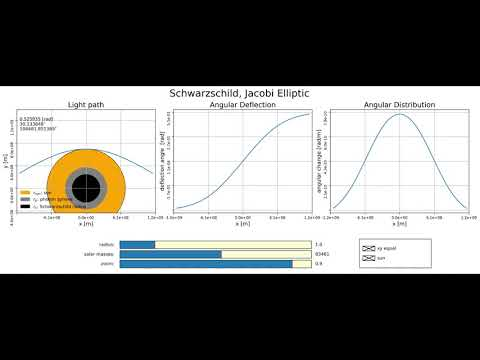

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('9oF-cBjufX8')